<a href="https://colab.research.google.com/github/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Figure_2/Figure_2c/3_compare_alignments_ebov_mutations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare ZEBOV mutation alignments

In [1]:
!pip install -q kb_python anndata==0.10.0
import kb_python.utils as kb_utils
import numpy as np
import pandas as pd
import json
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%config InlineBackend.figure_format='retina'

def nd(arr):
    """
    Function to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5

Download virus ID to sOTU mapping:

In [2]:
!git clone https://github.com/pachterlab/LSCHWCP_2023.git

Cloning into 'LSCHWCP_2023'...
remote: Enumerating objects: 3269, done.
remote: Counting objects: 100% (1751/1751), done.
remote: Compressing objects: 100% (1107/1107), done.
remote: Total 3269 (delta 1140), reused 1061 (delta 642), pack-reused 1518 (from 1)
Receiving objects: 100% (3269/3269), 290.88 MiB | 13.32 MiB/s, done.
Resolving deltas: 100% (1758/1758), done.
Updating files: 100% (410/410), done.


In [3]:
phylogeny_data = pd.read_csv("LSCHWCP_2023/PalmDB/ID_to_taxonomy_mapping.csv")
phylogeny_data.head()

,ID,rep_ID,phylum,class,order,family,genus,species,strandedness
0,u1,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
1,u10066,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
2,u10121,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
3,u10124,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
4,u102609,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA


In [4]:
phylogeny_data[phylogeny_data["species"].str.contains("Zaire ebolavirus")]

,ID,rep_ID,phylum,class,order,family,genus,species,strandedness
409,u10,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA
410,u103032,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA
411,u1124,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA
412,u11800,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA
413,u12185,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA
...,...,...,...,...,...,...,...,...,...
470,u52,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA
471,u55137,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA
472,u55996,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA
473,u9148,u10,Negarnaviricota,Monjiviricetes,Mononegavirales,Filoviridae,Ebolavirus,Zaire ebolavirus,-ssRNA


Load DIAMOND, Kraken2 and kallisto alignments computed in previous notebook:

In [5]:
!wget https://github.com/pachterlab/LSCHWCP_2023/raw/main/Notebooks/Figure_2/Figure_2c/kraken2_alignment.tar.gz
!tar -xvf kraken2_alignment.tar.gz

!wget https://github.com/pachterlab/LSCHWCP_2023/raw/main/Notebooks/Figure_2/Figure_2c/kallisto_alignment.tar.gz
!tar -xvf kallisto_alignment.tar.gz

# NEW: The DIAMOND alignment was added during Nat Biotech reviews
!wget https://github.com/pachterlab/LSCHWCP_2023/raw/main/Notebooks/Figure_2/Figure_2c/diamond_alignment.tar.gz
!tar -xvf diamond_alignment.tar.gz

--2024-11-12 18:58:04--  https://github.com/pachterlab/LSCHWCP_2023/raw/main/Notebooks/Figure_2/Figure_2c/diamond_alignment.tar.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_2/Figure_2c/diamond_alignment.tar.gz [following]
--2024-11-12 18:58:05--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_2/Figure_2c/diamond_alignment.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2490527 (2.4M) [application/octet-stream]
Saving to: ‘diamond_alignment.tar.gz’

diamond_alignment.t 100%[===================>]   2.38M 

In [6]:
# mutation rates
snp_rates = [
    0.02,
    0.03,
    0.04,
    0.05,     # Approx 1 SNP every 20th bp
    0.06,
    0.07,
    0.08,
    0.09,
    0.1,
    0.11,
    0.12,
    0.13,
    0.14,
    0.15,
    0.16,
    0.17,
    0.18,
    0.19,
    0.2,
    0.21,
    0.22,
    0.23,
    0.24,
    0.25,
    0.26,
    0.27,
    0.28,
    0.29,
    0.3
    ]

# Total number of reads in test dataset
total_reads = 676

### Get kb translated search results

In [7]:
# Get number of correct counts for unmutated files
target_ids = phylogeny_data[phylogeny_data["species"] == "Zaire ebolavirus"]["rep_ID"].unique()

# Load data
results_dir = "/content/kallisto_alignment/translated/0_ebov_snp_0_ms"

# Filepath to counts
X = f"{results_dir}/bustools_count/output.mtx"
# Filepath to barcode metadata
var_path = f"{results_dir}/bustools_count/output.genes.txt"
# Filepath to gene metadata
obs_path = f"{results_dir}/bustools_count/output.barcodes.txt"

# Create AnnData object
adata = kb_utils.import_matrix_as_anndata(X, obs_path, var_path)

# Get Ebola counts and standard deviation
kb_unmutated_ebov = adata.X[:, adata.var.index.isin(target_ids)].sum()
kb_unmutated_non_ebov = adata.X[:, ~adata.var.index.isin(target_ids)].sum()

precision = kb_unmutated_ebov / (kb_unmutated_ebov + kb_unmutated_non_ebov)
kb_unmutated_precision = precision

print("kb unmutated correct: ", kb_unmutated_ebov)
print("kb unmutated incorrect: ", kb_unmutated_non_ebov)
print("kb unmutated precision: ", kb_unmutated_precision)

kb unmutated correct:  676.0
kb unmutated incorrect:  0.0
kb unmutated precision:  1.0


In [8]:
adatas = []

target_ids = phylogeny_data[phylogeny_data["species"] == "Zaire ebolavirus"]["rep_ID"].unique()

ebov_counts = []
non_ebov_counts = []

df_kb = pd.DataFrame()
df_kb["snp_rate"] = snp_rates

for mut_round in np.arange(10):
    ebov_counts = []
    non_ebov_counts = []

    for snp_rate in snp_rates:
        # Load data
        results_dir = f"/content/kallisto_alignment/translated/{mut_round}_ebov_snp_{str(snp_rate).split('.')[-1]}_ms"

        # Filepath to counts
        X = f"{results_dir}/bustools_count/output.mtx"
        # Filepath to barcode metadata
        var_path = f"{results_dir}/bustools_count/output.genes.txt"
        # Filepath to gene metadata
        obs_path = f"{results_dir}/bustools_count/output.barcodes.txt"

        # Create AnnData object
        adata = kb_utils.import_matrix_as_anndata(X, obs_path, var_path)

        # Add snp_rate
        adata.obs["snp_rate"] = snp_rate

        # Append to adata list
        adatas.append(adata)

        # Get Ebola counts
        ebov_counts.append(adata.X[:, adata.var.index.isin(target_ids)].sum())

        non_ebov_counts.append(adata.X[:, ~adata.var.index.isin(target_ids)].sum())

    df_kb[f"pos_ebov_counts_{mut_round}"] = ebov_counts
    df_kb[f"non_ebov_counts_{mut_round}"] = non_ebov_counts
    df_kb[f"precision_{mut_round}"] = df_kb[f"pos_ebov_counts_{mut_round}"] / (df_kb[f"pos_ebov_counts_{mut_round}"] + df_kb[f"non_ebov_counts_{mut_round}"])

In [9]:
df_kb

,snp_rate,pos_ebov_counts_0,non_ebov_counts_0,precision_0,pos_ebov_counts_1,non_ebov_counts_1,precision_1,pos_ebov_counts_2,non_ebov_counts_2,precision_2,...,precision_6,pos_ebov_counts_7,non_ebov_counts_7,precision_7,pos_ebov_counts_8,non_ebov_counts_8,precision_8,pos_ebov_counts_9,non_ebov_counts_9,precision_9
0,0.02,585.0,8.0,0.986509,588.0,2.0,0.996610,577.0,5.0,0.991409,...,0.994774,573.0,2.0,0.996522,579.0,6.0,0.989744,587.0,4.0,0.993232
1,0.03,529.0,7.0,0.986940,515.0,5.0,0.990385,501.0,3.0,0.994048,...,0.977230,512.0,9.0,0.982726,520.0,7.0,0.986717,503.0,7.0,0.986275
2,0.04,460.0,4.0,0.991379,459.0,10.0,0.978678,453.0,15.0,0.967949,...,0.980645,444.0,14.0,0.969432,444.0,9.0,0.980132,442.0,20.0,0.956710
3,0.05,400.0,7.0,0.982801,402.0,12.0,0.971014,387.0,11.0,0.972362,...,0.952494,382.0,15.0,0.962217,386.0,9.0,0.977215,372.0,17.0,0.956298
4,0.06,336.0,21.0,0.941176,337.0,16.0,0.954674,347.0,19.0,0.948087,...,0.973451,323.0,13.0,0.961310,346.0,22.0,0.940217,350.0,14.0,0.961538
5,0.07,282.0,7.0,0.975779,277.0,22.0,0.926421,286.0,16.0,0.947020,...,0.948339,290.0,22.0,0.929487,277.0,19.0,0.935811,276.0,15.0,0.948454
6,0.08,227.0,20.0,0.919028,225.0,14.0,0.941423,246.0,17.0,0.935361,...,0.956522,255.0,18.0,0.934066,251.0,27.0,0.902878,225.0,21.0,0.914634
7,0.09,253.0,8.0,0.969349,252.0,13.0,0.950943,238.0,19.0,0.926070,...,0.945736,235.0,12.0,0.951417,246.0,16.0,0.938931,251.0,15.0,0.943609
8,0.10,204.0,22.0,0.902655,188.0,15.0,0.926108,200.0,17.0,0.921659,...,0.900901,188.0,14.0,0.930693,191.0,10.0,0.950249,199.0,10.0,0.952153
9,0.11,168.0,16.0,0.913043,155.0,16.0,0.906433,162.0,11.0,0.936416,...,0.919075,184.0,17.0,0.915423,148.0,14.0,0.913580,161.0,18.0,0.899441


### Get kb standard workflow results

In [10]:
# Get number of counts for unmutated files
# Load data
results_dir = f"/content/kallisto_alignment/standard/0_ebov_snp_0_ms"

# Filepath to counts
X = f"{results_dir}/bustools_count/output.mtx"
# Filepath to barcode metadata
var_path = f"{results_dir}/bustools_count/output.genes.txt"
# Filepath to gene metadata
obs_path = f"{results_dir}/bustools_count/output.barcodes.txt"

# Create AnnData object
adata = kb_utils.import_matrix_as_anndata(X, obs_path, var_path)

# Get Ebola counts
kb_sw_unmutated_ebov = adata.X.sum()

print("kb unmutated correct: ", kb_sw_unmutated_ebov)

kb unmutated correct:  662.0


In [11]:
adatas = []

ebov_counts = []
non_ebov_counts = []

df_sw_kb = pd.DataFrame()
df_sw_kb["snp_rate"] = snp_rates

for mut_round in np.arange(10):
    ebov_counts = []
    non_ebov_counts = []

    for snp_rate in snp_rates:
        # Load data
        results_dir = f"/content/kallisto_alignment/standard/{mut_round}_ebov_snp_{str(snp_rate).split('.')[-1]}_ms"

        # Filepath to counts
        X = f"{results_dir}/bustools_count/output.mtx"
        # Filepath to barcode metadata
        var_path = f"{results_dir}/bustools_count/output.genes.txt"
        # Filepath to gene metadata
        obs_path = f"{results_dir}/bustools_count/output.barcodes.txt"

        # Create AnnData object
        adata = kb_utils.import_matrix_as_anndata(X, obs_path, var_path)

        # Add snp_rate
        adata.obs["snp_rate"] = snp_rate

        # Append to adata list
        adatas.append(adata)

        # Get Ebola counts and standard deviation
        ebov_counts.append(adata.X.sum())

    df_sw_kb[f"pos_ebov_counts_{mut_round}"] = ebov_counts

In [12]:
df_sw_kb

,snp_rate,pos_ebov_counts_0,pos_ebov_counts_1,pos_ebov_counts_2,pos_ebov_counts_3,pos_ebov_counts_4,pos_ebov_counts_5,pos_ebov_counts_6,pos_ebov_counts_7,pos_ebov_counts_8,pos_ebov_counts_9
0,0.02,631.0,636.0,638.0,639.0,638.0,637.0,637.0,636.0,635.0,632.0
1,0.03,583.0,571.0,573.0,577.0,577.0,586.0,578.0,581.0,588.0,574.0
2,0.04,480.0,477.0,485.0,500.0,498.0,475.0,467.0,482.0,476.0,479.0
3,0.05,401.0,366.0,410.0,399.0,361.0,379.0,398.0,395.0,374.0,383.0
4,0.06,295.0,288.0,275.0,280.0,303.0,305.0,274.0,270.0,305.0,325.0
5,0.07,217.0,203.0,207.0,217.0,207.0,214.0,221.0,210.0,207.0,197.0
6,0.08,144.0,124.0,174.0,148.0,142.0,131.0,149.0,139.0,139.0,141.0
7,0.09,157.0,144.0,140.0,146.0,139.0,134.0,137.0,140.0,159.0,174.0
8,0.10,117.0,103.0,96.0,122.0,101.0,106.0,94.0,114.0,93.0,100.0
9,0.11,65.0,78.0,74.0,62.0,68.0,65.0,62.0,76.0,64.0,78.0


### Get translated search Kraken2 results
Note: No reads are aligned with the Kraken2 standard virus workflow. To get reads that align, I had to manually add the Ebola genome to the virus index (see previous notebook).

In [13]:
# Get counts for unmutated file

# Load data
kraken_res = "/content/kraken2_alignment/translated/0_ebov_snp_0_ms.k2report"

df = pd.read_csv(kraken_res, sep="\t", header=None)

try:
    kraken_ebov_count = df[df[7].str.contains("Zaire ebolavirus")].values[0][1]
except:
    kraken_ebov_count = 0
pkraken_unmutated_ebov = kraken_ebov_count

try:
    kraken_unclassified = df[df[7].str.contains("unclassified")].values[0][1]
except:
    kraken_unclassified = 0

if df[2].sum() != total_reads:
    print(f"KRAKEN READS DO NOT SUM TO {total_reads}!!!!")

pkraken_unmutated_non_ebov = total_reads - (kraken_unclassified + kraken_ebov_count)

In [14]:
df_pkraken = pd.DataFrame()
df_pkraken["snp_rate"] = snp_rates

for mut_round in np.arange(10):
    kraken_ebov_counts = []
    kraken_non_ebov_counts = []
    for snp_rate in snp_rates:
        # Load data
        kraken_res = f"/content/kraken2_alignment/translated/{mut_round}_ebov_snp_{str(snp_rate).split('.')[-1]}_ms.k2report"

        df = pd.read_csv(kraken_res, sep="\t", header=None)

        try:
            kraken_ebov_count = df[df[7].str.contains("Zaire ebolavirus")].values[0][1]
        except:
            kraken_ebov_count = 0
        kraken_ebov_counts.append(kraken_ebov_count)

        try:
            kraken_unclassified = df[df[7].str.contains("unclassified")].values[0][1]
        except:
            kraken_unclassified = 0

        if df[2].sum() != total_reads:
            print(f"KRAKEN READS DO NOT SUM TO {total_reads}!!!!")

        kraken_non_ebov_counts.append(total_reads - (kraken_unclassified + kraken_ebov_count))

    df_pkraken[f"pos_ebov_counts_{mut_round}"] = kraken_ebov_counts
    df_pkraken[f"non_ebov_counts_{mut_round}"] = kraken_non_ebov_counts
df_pkraken

,snp_rate,pos_ebov_counts_0,non_ebov_counts_0,pos_ebov_counts_1,non_ebov_counts_1,pos_ebov_counts_2,non_ebov_counts_2,pos_ebov_counts_3,non_ebov_counts_3,pos_ebov_counts_4,...,pos_ebov_counts_5,non_ebov_counts_5,pos_ebov_counts_6,non_ebov_counts_6,pos_ebov_counts_7,non_ebov_counts_7,pos_ebov_counts_8,non_ebov_counts_8,pos_ebov_counts_9,non_ebov_counts_9
0,0.02,531,0,541,0,515,0,540,0,546,...,535,0,529,0,536,0,516,0,527,0
1,0.03,407,0,404,0,407,0,401,0,406,...,400,0,392,0,409,0,405,0,405,0
2,0.04,311,0,287,0,286,0,307,0,293,...,277,0,291,0,288,0,277,0,310,0
3,0.05,199,0,226,0,230,0,197,0,206,...,213,0,205,0,208,0,207,0,218,0
4,0.06,151,0,149,0,151,0,145,0,139,...,161,0,167,0,145,0,162,0,154,0
5,0.07,101,0,96,0,109,0,103,0,93,...,96,0,125,0,110,0,96,0,111,0
6,0.08,63,0,63,0,79,0,70,0,75,...,67,0,82,0,77,0,62,0,73,0
7,0.09,80,0,64,0,50,0,66,0,57,...,65,0,84,0,72,0,84,0,79,0
8,0.10,49,0,53,0,60,0,47,0,44,...,52,0,53,0,44,0,60,0,61,0
9,0.11,30,0,34,0,28,0,43,0,47,...,36,0,32,0,50,0,30,0,38,0


### Get actual mutation rates (might differ from target rate)

In [15]:
!pip install -q biopython

In [16]:
from Bio import SeqIO

all_mutation_rates = []
mean_mutation_rates = []
for snp_rate in snp_rates:
    mutation_rates_temp = []
    for mut_round in np.arange(10):
        ref = "LSCHWCP_2023/Notebooks/Figure_2/Figure_2c/SRR12698539_2_extracted_u10.fa"
        ref = {record.id: record.seq for record in SeqIO.parse(ref, 'fasta')}

        que = f"LSCHWCP_2023/Notebooks/Figure_2/Figure_2c/mutated_files/{mut_round}_ebov_snp_{str(snp_rate).split('.')[-1]}_ms.fa"
        que = {record.id: record.seq for record in SeqIO.parse(que, 'fasta')}

        diff = length = 0
        diff_per_seq = []

        for record, rseq in ref.items():
            seq_diff = 0
            for position, rbase in enumerate(rseq):
                if rbase != que[record][position]:
                    diff += 1
                    seq_diff += 1
                length += 1

            diff_per_seq.append(seq_diff)


        # Save actual mutation rate
        actual_mut_rate = round(diff * 100 / length, 2)
        mutation_rates_temp.append(actual_mut_rate)

    # Save mean mutation for each target SNP rate
    mean_mutation_rates.append(round(np.mean(mutation_rates_temp), 2))
    all_mutation_rates.append(mutation_rates_temp)

Reformat data into continuous lists to plot raw data for real mutation rates (instead of target rates):

In [17]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [18]:
pkraken_y = []
kb_y = []
kb_sw_y = []

for idx, snp_rate in enumerate(snp_rates):
    pkraken_y.append(df_pkraken[df_pkraken["snp_rate"] == snp_rate][[i for i in df_pkraken.columns if "pos" in i]].values[0])
    kb_y.append(df_kb[df_kb["snp_rate"] == snp_rate][[i for i in df_kb.columns if "pos" in i]].values[0])
    kb_sw_y.append(df_sw_kb[df_sw_kb["snp_rate"] == snp_rate][[i for i in df_sw_kb.columns if "pos" in i]].values[0])


# Flatten all lists of lists and add counts for unmutated sequences
pkraken_y = flatten(pkraken_y)
kb_y = flatten(kb_y)
kb_sw_y = flatten(kb_sw_y)
all_mutation_rates_flat = flatten(all_mutation_rates)

Fit sigmoid functions using non-linear least squares:

In [19]:
# https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

xdata = all_mutation_rates_flat

# Estimate parameters and covariance
p0 = [max(pkraken_y), np.median(xdata), 1, min(pkraken_y)] # Mandatory initial guess
pkraken_popt, pkraken_pcov = curve_fit(sigmoid, xdata, pkraken_y, p0, method='dogbox', maxfev=5000)

p0 = [max(kb_y), np.median(xdata), 1, min(kb_y)]
kb_popt, kb_pcov = curve_fit(sigmoid, xdata, kb_y, p0, method='dogbox', maxfev=5000)

p0 = [max(kb_sw_y), np.median(xdata), 1, min(kb_sw_y)]
kb_sw_popt, kb_sw_pcov = curve_fit(sigmoid, xdata, kb_sw_y, p0, method='dogbox', maxfev=5000)

x_ = np.linspace(1, max(all_mutation_rates_flat), 1000)

# Predict values
pkraken_y_pred = sigmoid(x_, *pkraken_popt)
kb_y_pred = sigmoid(x_, *kb_popt)
kb_sw_y_pred = sigmoid(x_, *kb_sw_popt)

Plot:

In [20]:
df_recall = pd.DataFrame()

# Compute recall percentages
df_recall["mut_perc"] = [0] + xdata
df_recall["kb"] = [kb_unmutated_ebov / (total_reads/100)] + list(np.array(kb_y) / (total_reads/100))
df_recall["kb_standard"] = [kb_sw_unmutated_ebov / (total_reads/100)] + list(np.array(kb_sw_y) / (total_reads/100))
df_recall["kraken"] = [pkraken_unmutated_ebov / (total_reads/100)] + list(np.array(pkraken_y) / (total_reads/100))

df_recall

,mut_perc,kb,kb_standard,kraken
0,0.00,100.000000,97.928994,94.082840
1,1.14,86.538462,93.343195,78.550296
2,1.14,86.982249,94.082840,80.029586
3,1.14,85.355030,94.378698,76.183432
4,1.14,88.165680,94.526627,79.881657
...,...,...,...,...
286,22.98,0.295858,0.000000,0.000000
287,23.04,0.739645,0.000000,0.000000
288,23.01,0.443787,0.000000,0.000000
289,23.04,0.443787,0.000000,0.000000


In [21]:
# Compute mean difference between kallisto and kraken
mean_dif = []
for i in np.arange(23):
    temp = df_recall[(df_recall["mut_perc"] >= i) & (df_recall["mut_perc"] < i+1)]
    mean_dif.append(temp["kb"].mean() - temp["kraken"].mean())
mean_dif

[5.917159763313606,
 7.544378698224875,
 16.094674556213015,
 23.624260355029584,
 26.065088757396452,
 27.544378698224854,
 25.665680473372774,
 25.325443786982255,
 20.79881656804734,
 18.683431952662723,
 16.079881656804737,
 13.757396449704144,
 10.092044707429325,
 7.040075309306079,
 5.710059171597633,
 3.994082840236687,
 3.3579881656804735,
 2.57396449704142,
 1.9082840236686391,
 1.13905325443787,
 1.01577909270217,
 0.7248520710059171,
 0.5325443786982248]

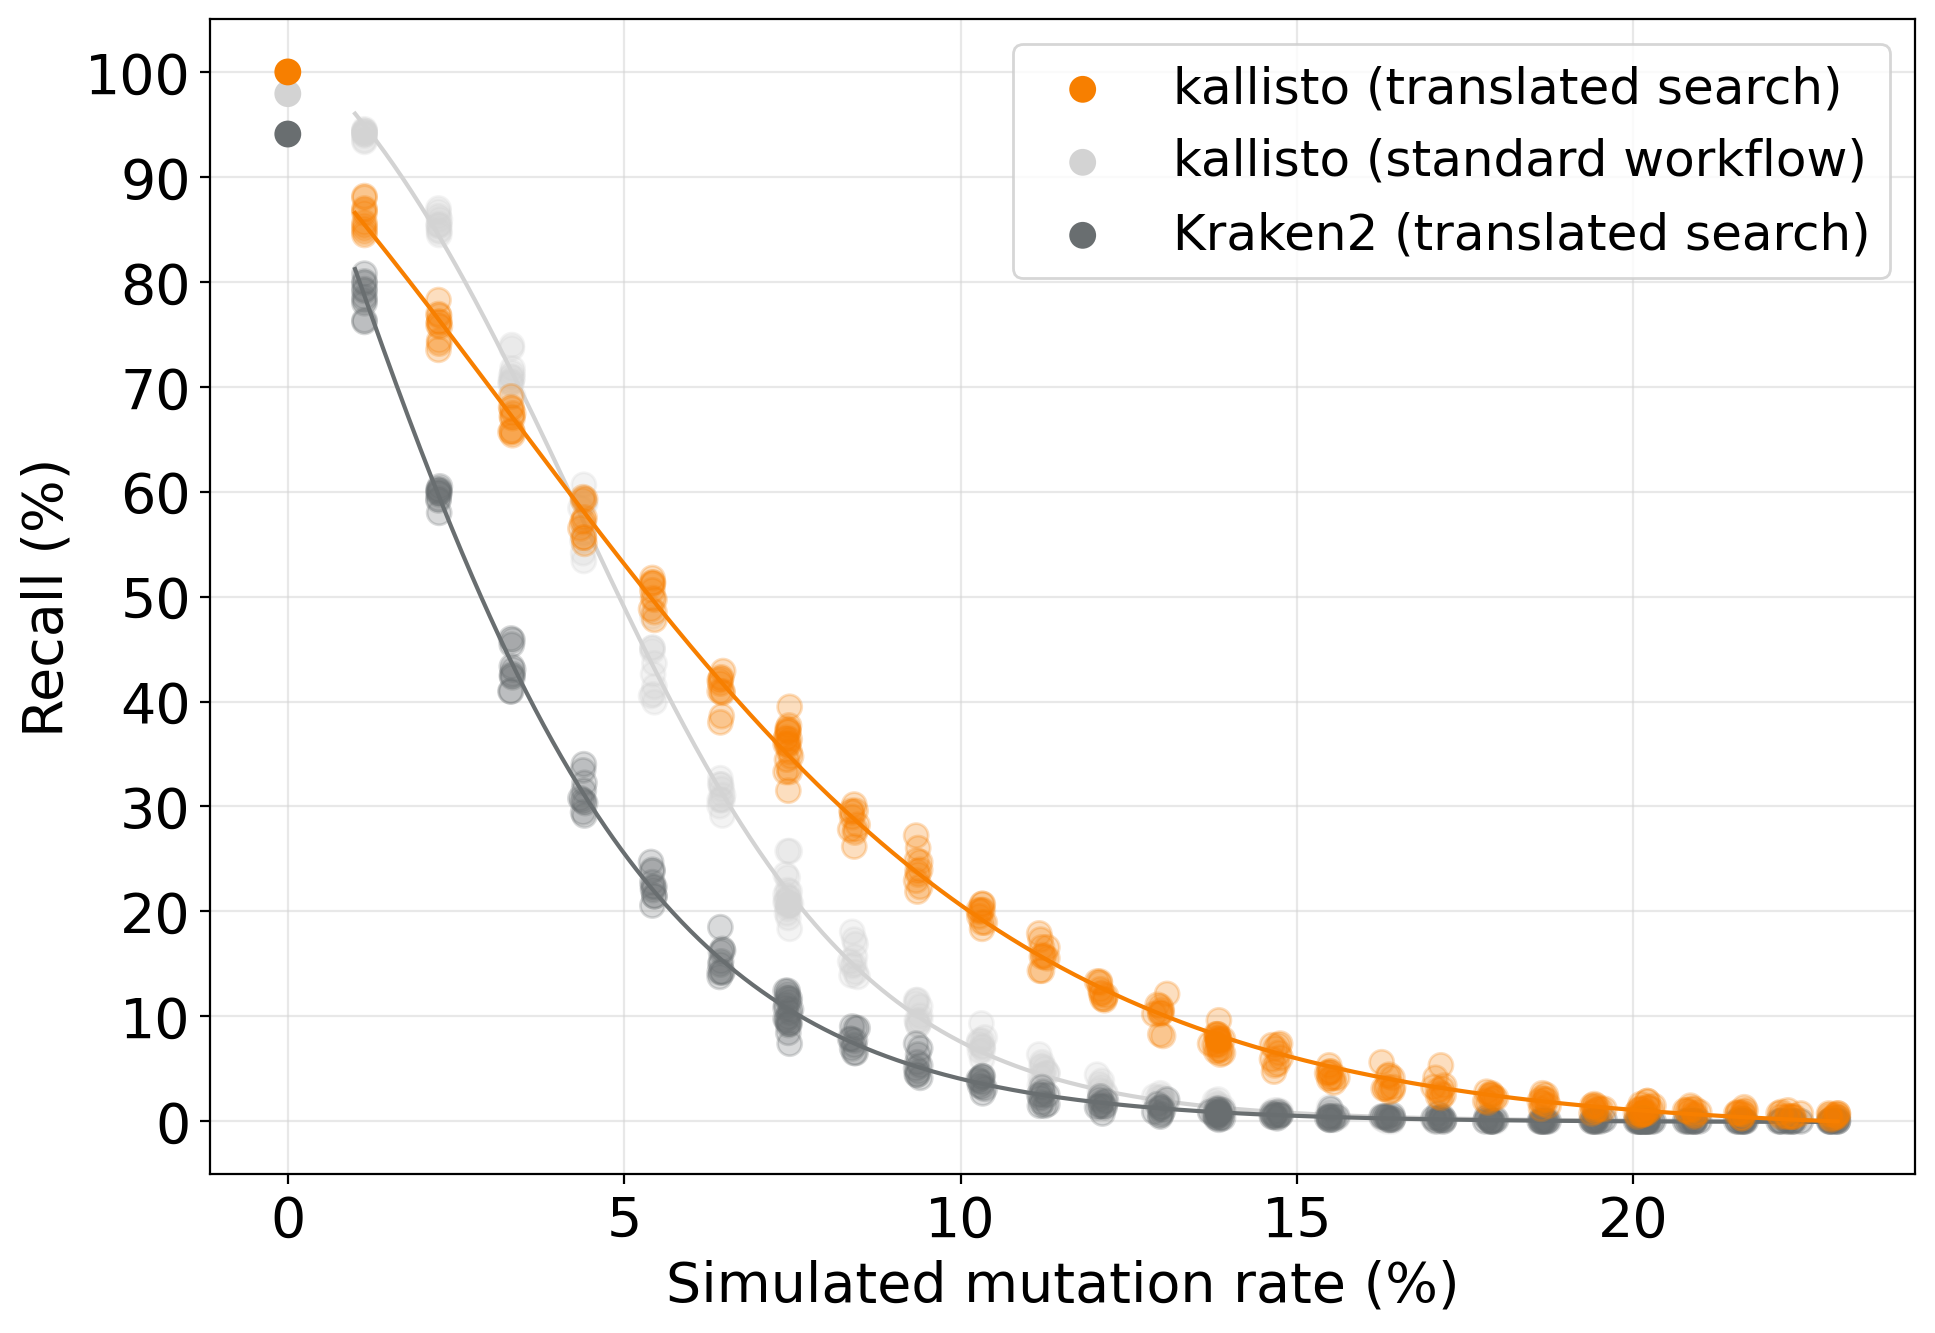

In [22]:
fig, ax = plt.subplots(figsize=(11, 7.5))
fontsize = 20
fontdict = {
    'weight': 'normal',
    'size': fontsize,
    }

# Plot recall percentages

kallisto_c = "#f77f00"
kallisto_sw_c = "lightgrey"
kraken_c = "#98c1d9"
kraken_t_c = "#696E70" # "#003049"

s = 75
# Define alphas
alphas = [1] + [0.25]*(len(df_recall)-1)

x = all_mutation_rates_flat
# y_25 = df["power_25perc"].values
# y_75 = df["power_75perc"].values
# y_std = df["STD"].values

# Plot actual data and fitted line
## Divide y values by (total_reads/100) to convert to %
ax.scatter(df_recall["mut_perc"].values, df_recall["kb"].values, color=kallisto_c, label="kallisto (translated search)", zorder=3, s=s, alpha=alphas)
# Plot prediction line
ax.plot(x_, kb_y_pred / (total_reads/100), color=kallisto_c, zorder=3)
# # Connect prediction to unmutated data point
# ax.plot([0, 1], np.array([kb_unmutated_ebov, kb_y_pred[0]]) / (total_reads/100), color=kallisto_c, zorder=2)

ax.scatter(df_recall["mut_perc"].values, df_recall["kb_standard"].values, color=kallisto_sw_c, label="kallisto (standard workflow)", zorder=1, s=s, alpha=alphas)
ax.plot(x_, kb_sw_y_pred / (total_reads/100), color=kallisto_sw_c, zorder=1)
# ax.plot([0, 1], np.array([kb_sw_unmutated_ebov, kb_sw_y_pred[0]]) / (total_reads/100), color=kallisto_sw_c, zorder=2)

ax.scatter(df_recall["mut_perc"].values, df_recall["kraken"].values, color=kraken_t_c, label="Kraken2 (translated search)", zorder=2, s=s, alpha=alphas)
ax.plot(x_, pkraken_y_pred / (total_reads/100), color=kraken_t_c, zorder=2)
# ax.plot([0, 1], np.array([pkraken_unmutated_ebov, pkraken_y_pred[0]]) / (total_reads/100), color=kraken_t_c, zorder=2)

# Plot percentiles
# # ax.plot(x, y_25, color=colors[i], ls="-.", alpha=0.5,label="25$^{th}$-75$^{th}$ %")
# ax.plot(x, y_25, color=colors[i], ls="-.", alpha=0.5)
# ax.plot(x, y_75, color=colors[i], ls="-.", alpha=0.5)
# # Fill space between percentile bands
# ax.fill_between(x, y_25, y_75, alpha=0.075, color=colors[i])

# Plot STD
# ax.plot(x, y+y_std, color=colors[i], ls="--", label="SD", alpha=0.3)
# ax.plot(x, y-y_std, color=colors[i], ls="--", alpha=0.3)
# # Fill space between STD bands
# ax.fill_between(x, y+y_std, y-y_std, alpha=0.05, color=colors[i])

# Add legend
# ax.legend(bbox_to_anchor=(1.001, 1.025), loc='upper left', fontsize=fontsize)
leg = ax.legend(fontsize=fontsize-2)
# for lh in leg.legendHandles:
#     lh.set_alpha(1)

# Customize axes labels
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_ylabel("Recall (%)", fontdict=fontdict)

# Set major ticks
ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(10))

# # Set y-axis bottom
# ax.set_ylim(bottom=-10)

# # Add thousands separator to y axis
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add grid
ax.grid(visible=True, which="both", color="lightgrey", alpha=0.5)
ax.set_axisbelow(True)

ax.set_xlabel("Simulated mutation rate (%)", fontdict=fontdict)

fig.savefig("mutation_benchmark_recall.png", dpi=300, bbox_inches="tight")

plt.show()

Add a heatmap showing the difference between kallisto and Kraken2:

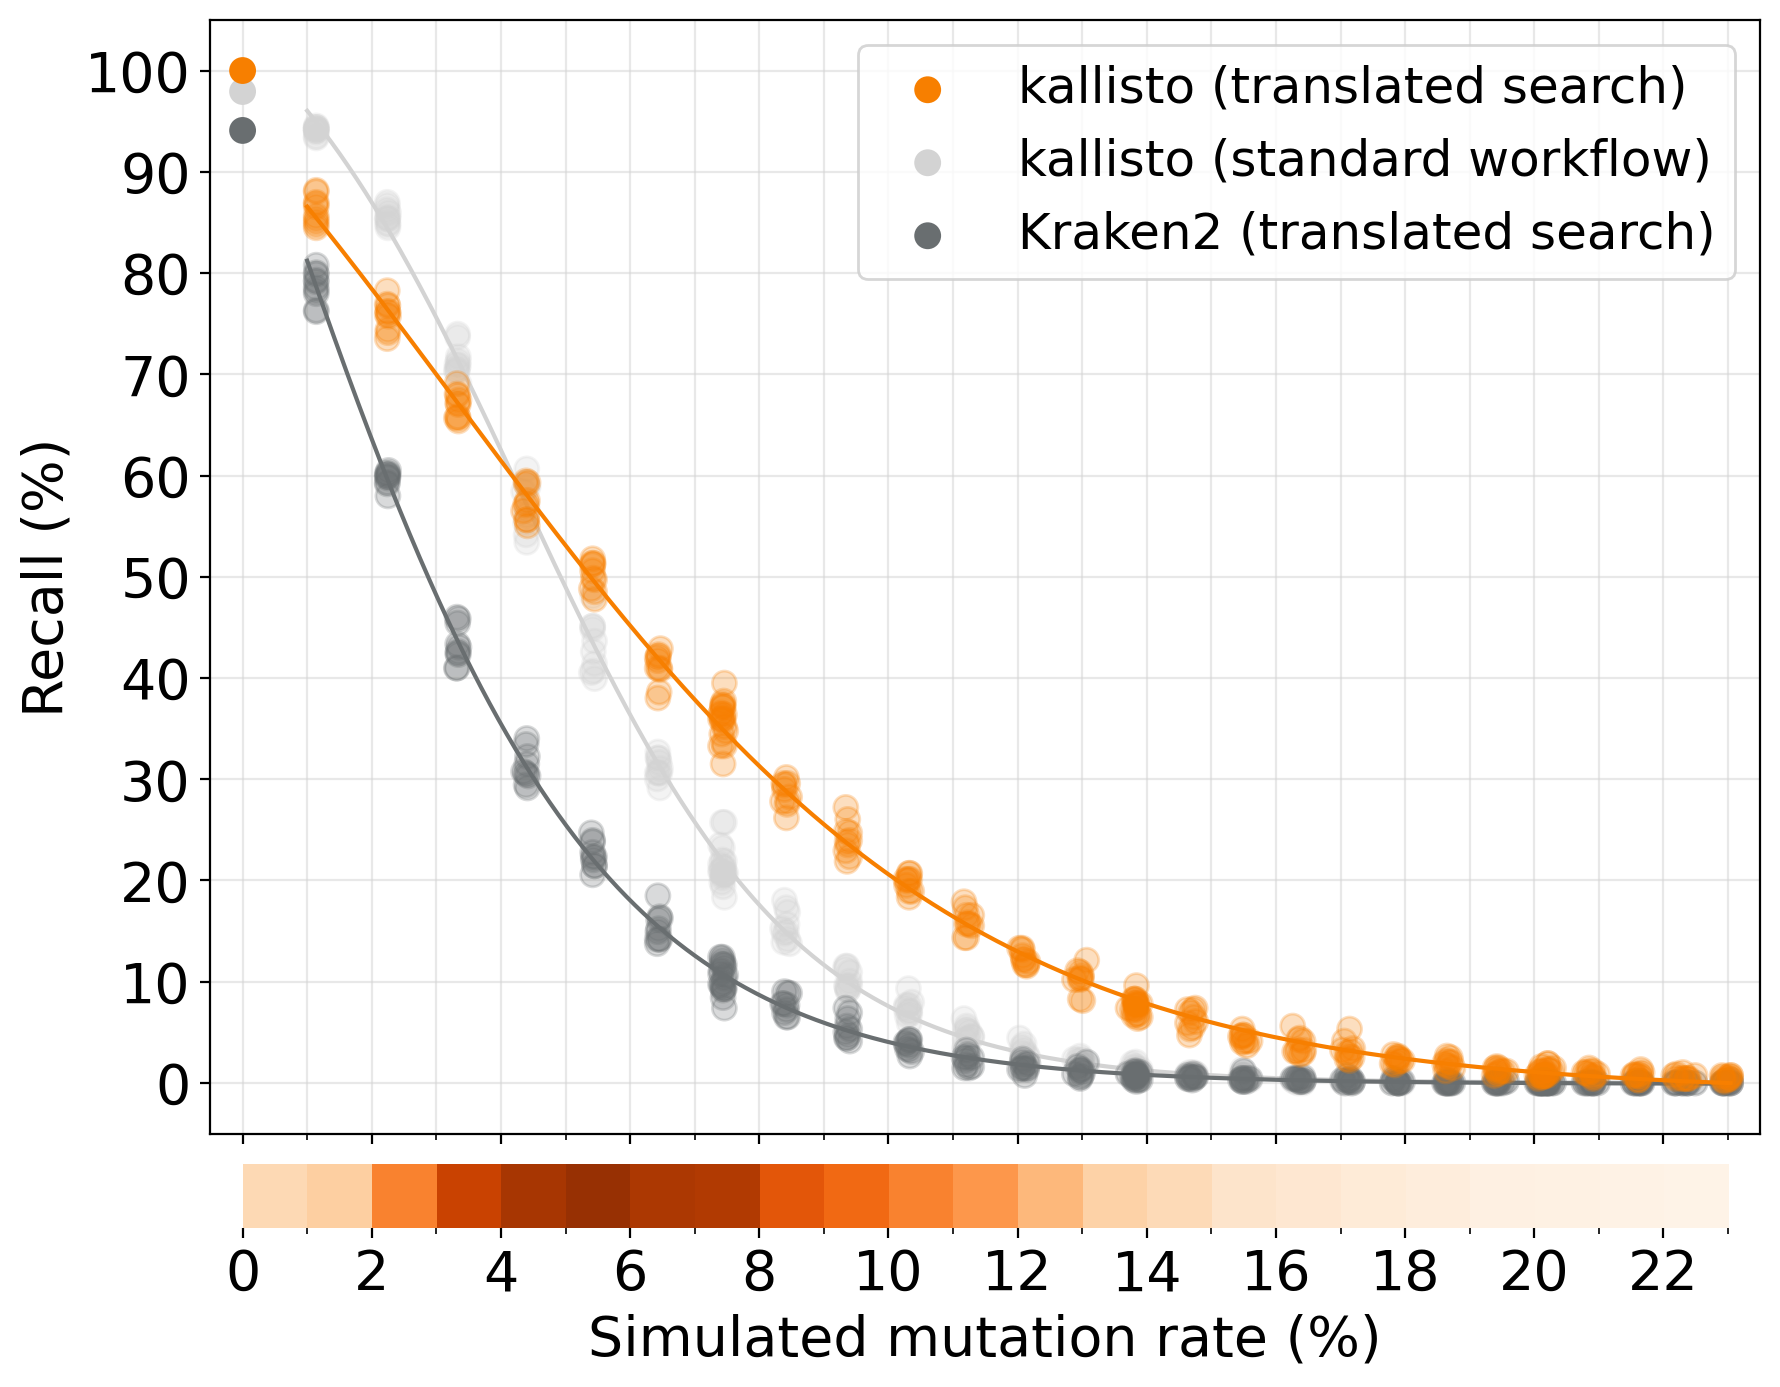

In [23]:
fig, axs = plt.subplots(figsize=(10, 8), nrows=2, sharex=True, gridspec_kw={'height_ratios': [10, 1], 'hspace': 0.01})
fontsize = 20
fontdict = {
    'weight': 'normal',
    'size': fontsize,
    }

# Plot recall percentages
ax=axs[0]

kallisto_c = "#f77f00"
kallisto_sw_c = "lightgrey"
kraken_c = "#98c1d9"
kraken_t_c = "#696E70" # "#003049"

s = 75
# Define alphas
alphas = [1] + [0.25]*(len(df_recall)-1)

x = all_mutation_rates_flat
# y_25 = df["power_25perc"].values
# y_75 = df["power_75perc"].values
# y_std = df["STD"].values

# Plot actual data and fitted line
## Divide y values by (total_reads/100) to convert to %
ax.scatter(df_recall["mut_perc"].values, df_recall["kb"].values, color=kallisto_c, label="kallisto (translated search)", zorder=3, s=s, alpha=alphas)
# Plot prediction line
ax.plot(x_, kb_y_pred / (total_reads/100), color=kallisto_c, zorder=3)
# # Connect prediction to unmutated data point
# ax.plot([0, 1], np.array([kb_unmutated_ebov, kb_y_pred[0]]) / (total_reads/100), color=kallisto_c, zorder=2)

ax.scatter(df_recall["mut_perc"].values, df_recall["kb_standard"].values, color=kallisto_sw_c, label="kallisto (standard workflow)", zorder=1, s=s, alpha=alphas)
ax.plot(x_, kb_sw_y_pred / (total_reads/100), color=kallisto_sw_c, zorder=1)
# ax.plot([0, 1], np.array([kb_sw_unmutated_ebov, kb_sw_y_pred[0]]) / (total_reads/100), color=kallisto_sw_c, zorder=2)

ax.scatter(df_recall["mut_perc"].values, df_recall["kraken"].values, color=kraken_t_c, label="Kraken2 (translated search)", zorder=2, s=s, alpha=alphas)
ax.plot(x_, pkraken_y_pred / (total_reads/100), color=kraken_t_c, zorder=2)
# ax.plot([0, 1], np.array([pkraken_unmutated_ebov, pkraken_y_pred[0]]) / (total_reads/100), color=kraken_t_c, zorder=2)

# Plot percentiles
# # ax.plot(x, y_25, color=colors[i], ls="-.", alpha=0.5,label="25$^{th}$-75$^{th}$ %")
# ax.plot(x, y_25, color=colors[i], ls="-.", alpha=0.5)
# ax.plot(x, y_75, color=colors[i], ls="-.", alpha=0.5)
# # Fill space between percentile bands
# ax.fill_between(x, y_25, y_75, alpha=0.075, color=colors[i])

# Plot STD
# ax.plot(x, y+y_std, color=colors[i], ls="--", label="SD", alpha=0.3)
# ax.plot(x, y-y_std, color=colors[i], ls="--", alpha=0.3)
# # Fill space between STD bands
# ax.fill_between(x, y+y_std, y-y_std, alpha=0.05, color=colors[i])

# Add legend
# ax.legend(bbox_to_anchor=(1.001, 1.025), loc='upper left', fontsize=fontsize)
leg = ax.legend(fontsize=fontsize-2)
# for lh in leg.legendHandles:
#     lh.set_alpha(1)

# Customize axes labels
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_ylabel("Recall (%)", fontdict=fontdict)

# Set major ticks
ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(10))

# # Set y-axis bottom
# ax.set_ylim(bottom=-10)

# # Add thousands separator to y axis
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add grid
ax.grid(visible=True, which="both", color="lightgrey", alpha=0.5)
ax.set_axisbelow(True)


# Add heatmap
ax = axs[1]
im = ax.imshow(np.array([mean_dif]), extent=[0,23,-0.5,0.5], cmap="Oranges", vmin=0, vmax=30)

# # Add colorbar
# cb = plt.colorbar(im)
# cb.set_label(label="kallisto (translated search) recall (%) - Kraken2 (translated search) recall (%)", size=fontsize)
# cb.ax.tick_params(axis="both", labelsize=fontsize+6, length=8, width=2, pad=8) # Trying to match sns colorbar

# Set x-axis limit
ax.set_xlim(left=-0.5, right=23.5)
# Set major ticks
ax.xaxis.set_major_locator(MultipleLocator(2))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))

for pos in ['right', 'top', 'bottom', 'left']:
    ax.spines[pos].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_yticks([])
ax.set_xlabel("Simulated mutation rate (%)", fontdict=fontdict)

fig.savefig("mutation_benchmark_recall_heatmap.png", dpi=300, bbox_inches="tight")

plt.show()

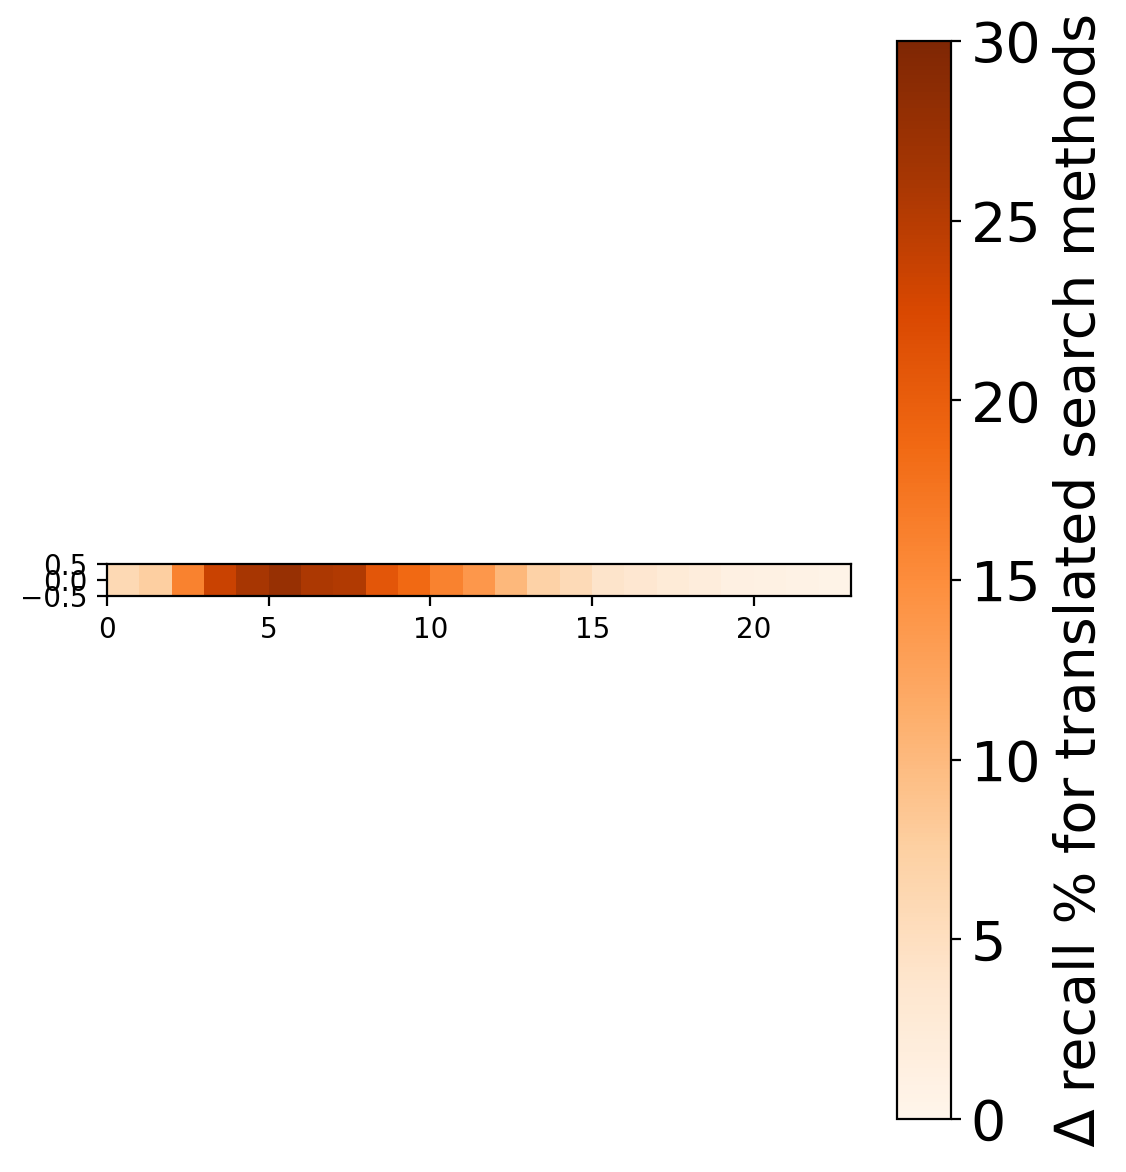

In [24]:
# Generate the colorbar for the heatmap above
fig, ax = plt.subplots(figsize=(6, 7))
im = ax.imshow(np.array([mean_dif]), extent=[0,23,-0.5,0.5], cmap="Oranges", vmin=0, vmax=30)

# Add colorbar
cb = plt.colorbar(im, shrink=1)
cb.set_label(label="∆ recall % for translated search methods", size=fontsize)
cb.ax.tick_params(axis="both", labelsize=fontsize)

fig.savefig("mutation_benchmark_recall_colorbar.png", dpi=300, bbox_inches="tight")

# Plot precision of kallisto translated search alignment
While the other methods were only given the target virus, kallisto translated search had to distinguish the correct virus from all other viruses in the PalmDB.

In [25]:
kb_y = []

for idx, snp_rate in enumerate(snp_rates):
    kb_y.append(df_kb[df_kb["snp_rate"] == snp_rate][[i for i in df_kb.columns if "precision" in i]].values[0])


# Flatten all lists of lists and add counts for unmutated sequences
kb_y = flatten(kb_y)
all_mutation_rates_flat = flatten(all_mutation_rates)

Fit sigmoid functions using non-linear least squares:

In [26]:
xdata = all_mutation_rates_flat

p0 = [max(kb_y), np.median(xdata), 1, min(kb_y)]
kb_popt, kb_pcov = curve_fit(sigmoid, xdata, kb_y, p0, method='dogbox', maxfev=5000)

x_ = np.linspace(1, max(all_mutation_rates_flat), 1000)

# Predict values
kb_y_pred = sigmoid(x_, *kb_popt)

Plot:

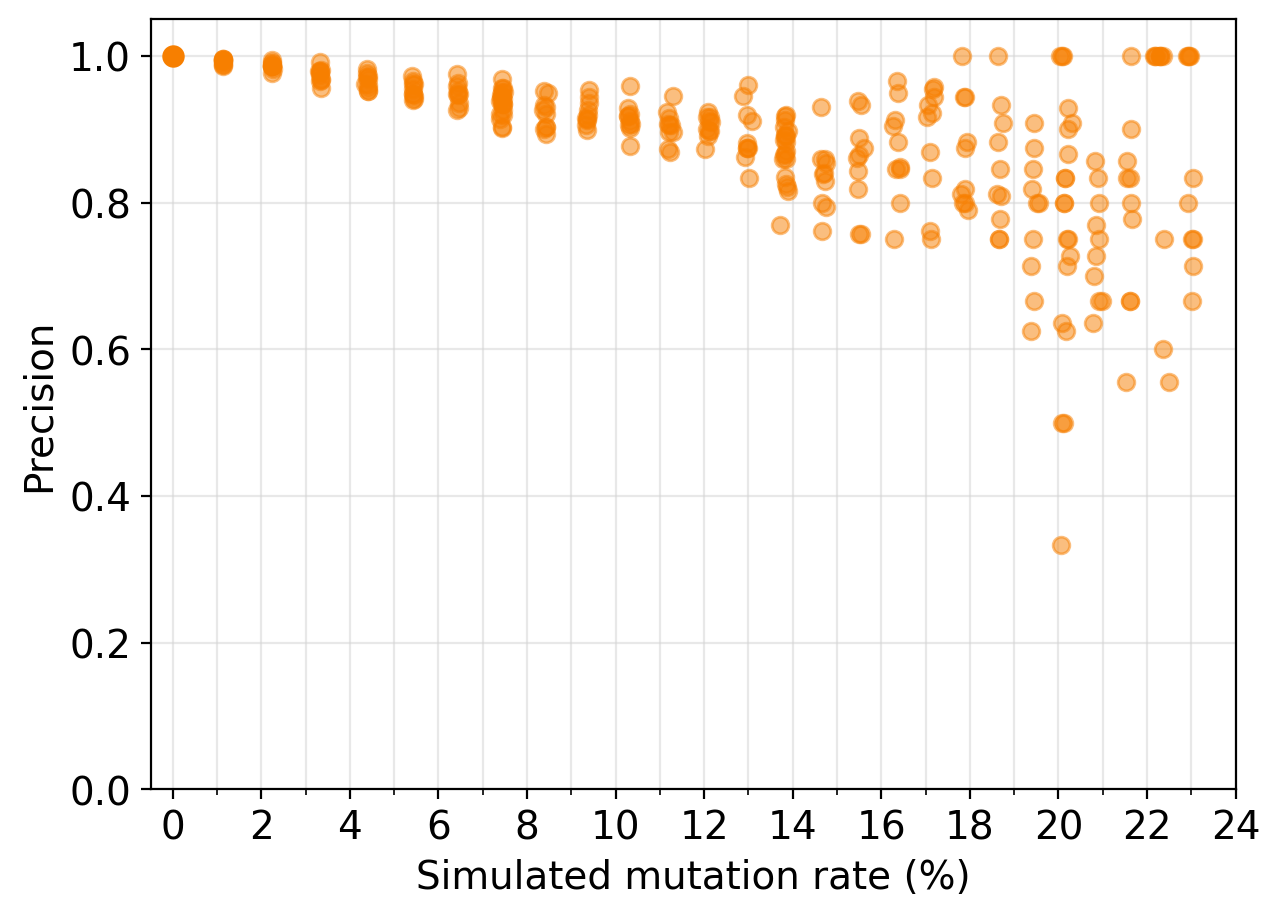

In [27]:
fig, ax = plt.subplots(figsize=(7, 5))
fontsize = 14
fontdict = {
    'weight': 'normal',
    'size': fontsize,
    }

kallisto_c = "#f77f00"

x = all_mutation_rates_flat

# Plot actual data and fitted line
ax.scatter(0, kb_unmutated_precision, color=kallisto_c, zorder=3, s=50)
ax.scatter(x, np.array(kb_y), color=kallisto_c, zorder=3, alpha=0.5)
# ax.plot(x_, kb_y_pred, color=kallisto_c, zorder=3)

# Set title
ax.set_title(f"", fontsize=fontsize+2)

# Customize axes labels
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xlabel("Simulated mutation rate (%)", fontdict=fontdict)
ax.set_ylabel("Precision", fontdict=fontdict)

# Set major ticks to be multiples of 2
ax.xaxis.set_major_locator(MultipleLocator(2))
# ax.yaxis.set_major_locator(MultipleLocator(10))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(10))

# # Set x-axis limit
ax.set_xlim(left=-0.5, right=24)

# # Set y-axis lim
ax.set_ylim(bottom=0, top=1.05)

# # Add thousands separator to y axis
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add grid
ax.grid(visible=True, which="both", color="lightgrey", alpha=0.5)
ax.set_axisbelow(True)

fig.savefig("mutation_benchmark_precision.png", dpi=300, bbox_inches="tight")

plt.show()

## Plot DIAMOND results
NEW: The DIAMOND alignment was added during Nat Biotech reviews

In [47]:
diamond_df = pd.DataFrame()
diamond_df["actual_mut_rate"] = [0] + all_mutation_rates_flat

average_ident = []
num_aligned = []
for snp_rate in snp_rates:
    for mut_round in np.arange(10):
        # Load data
        results = f"/content/diamond_alignment/{mut_round}_ebov_snp_{str(snp_rate).split('.')[-1]}_ms_diamond.csv"
        temp_df = pd.read_csv(results)

        average_ident.append(temp_df["identity_percentage"].values.mean())
        num_aligned.append(len(temp_df))

# Also add results for unmutated sequences
results = "/content/diamond_alignment/unmutated_diamond.csv"
temp_df = pd.read_csv(results)

diamond_df[f"mean_idenity_perc"] = [temp_df["identity_percentage"].values.mean()] + average_ident
diamond_df[f"num_seqs_aligned"] = [len(temp_df)] + num_aligned

diamond_df

,actual_mut_rate,mean_idenity_perc,num_seqs_aligned
0,0.00,95.406716,670
1,1.14,93.174179,670
2,1.14,93.115970,670
3,1.14,93.172090,670
4,1.14,93.258657,670
...,...,...,...
286,22.98,54.983750,400
287,23.04,55.092718,412
288,23.01,55.705585,376
289,23.04,55.481907,409


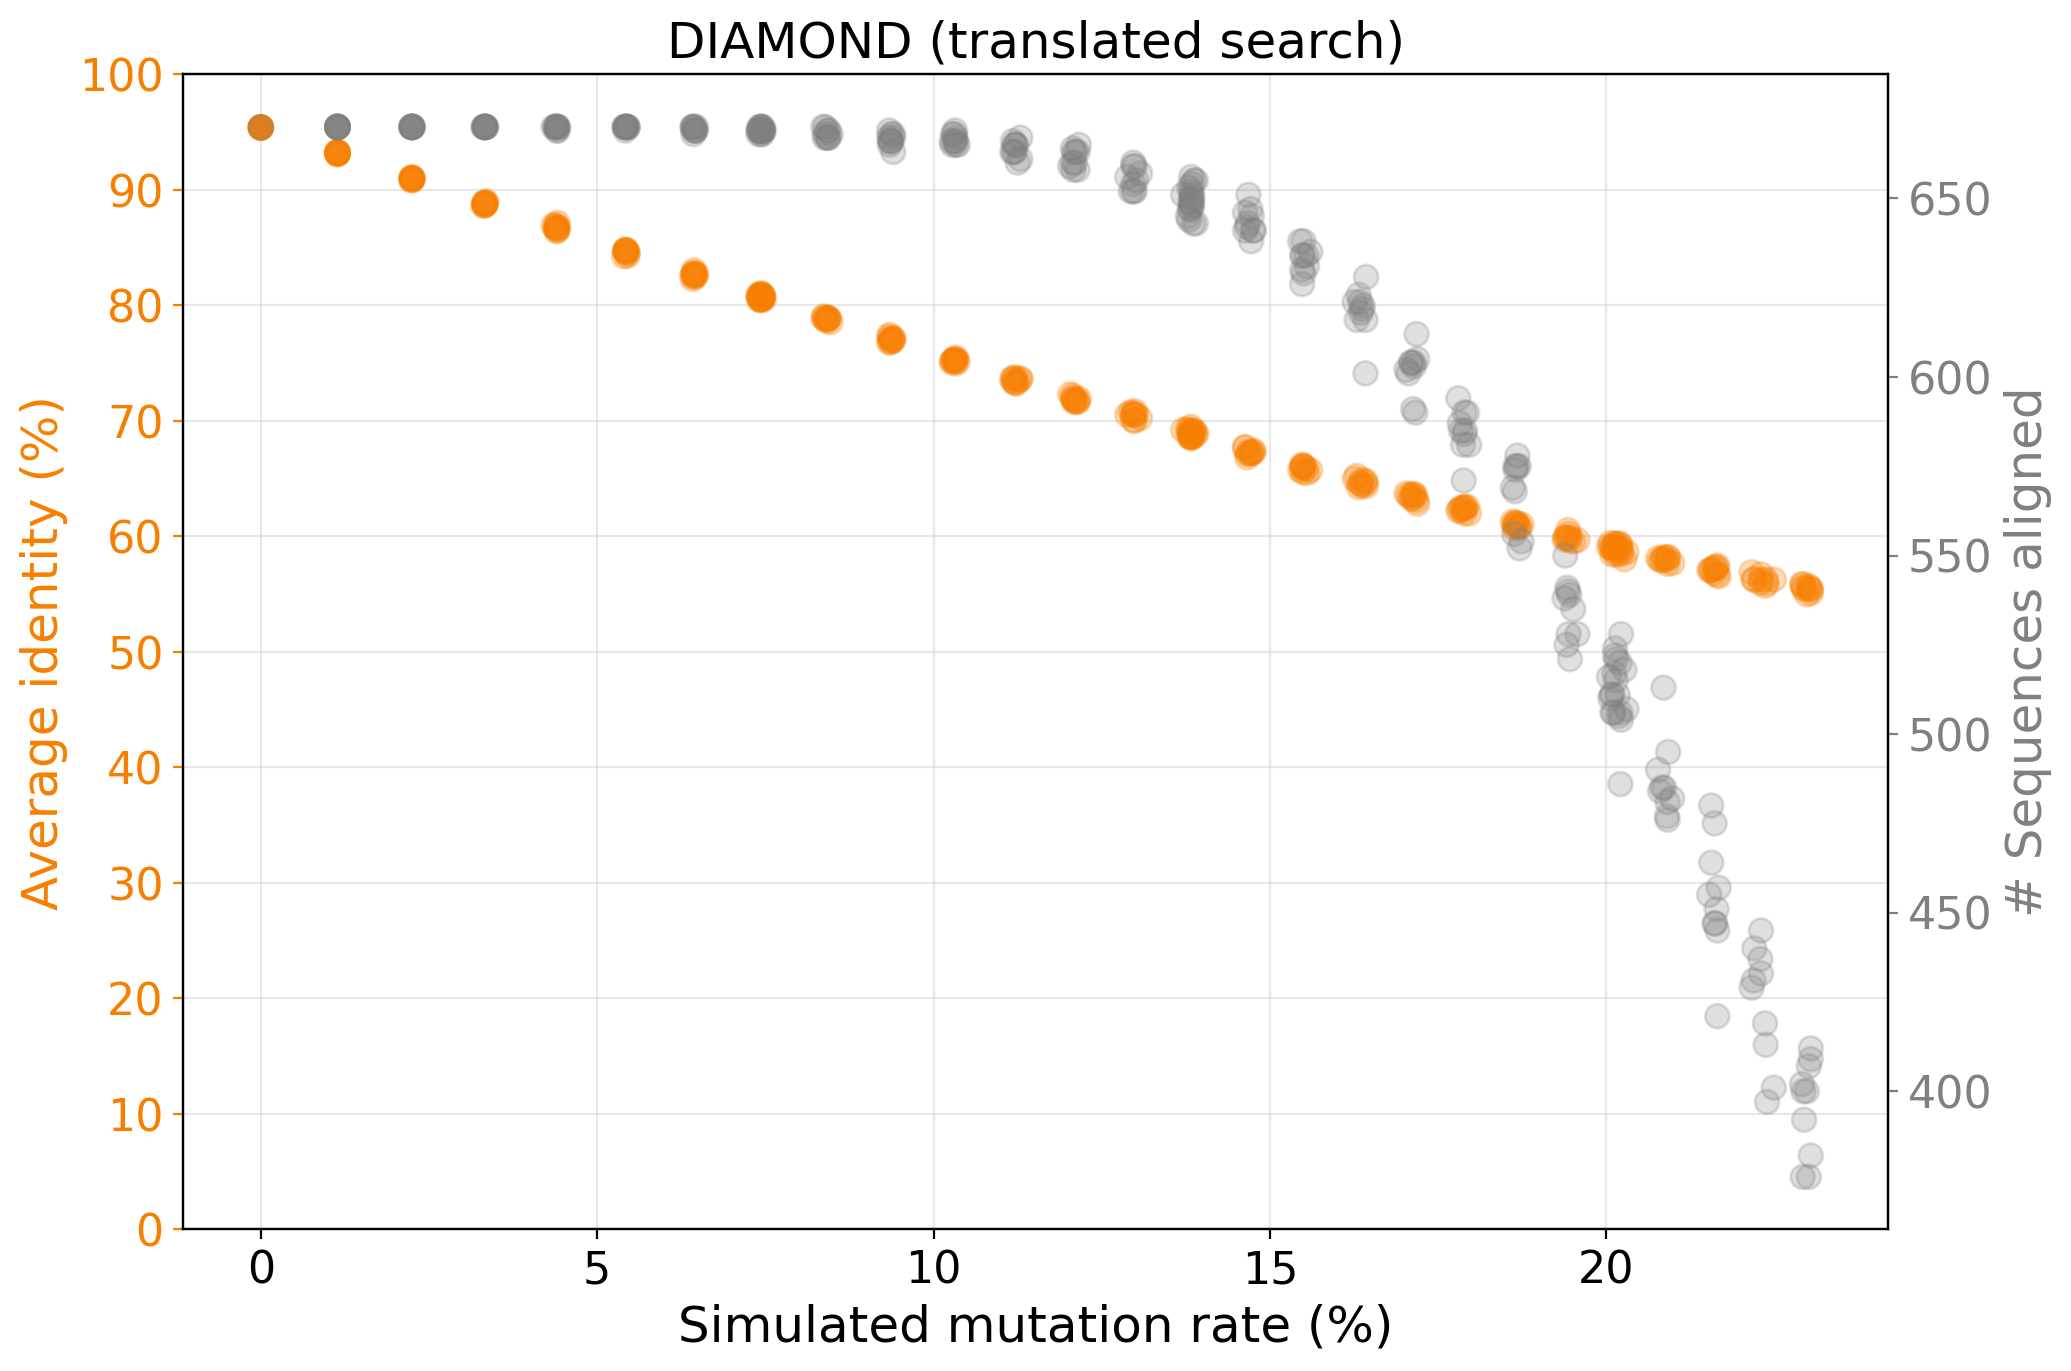

In [79]:
fig, ax = plt.subplots(figsize=(11, 7.5))
fontsize = 16

ident_c = "#f77f00"
num_seq_c = "grey"

s = 75
# Define alphas
alpha = 0.25
alphas = [1] + [alpha]*(len(diamond_df)-1)

# Extract data from the DataFrame
mutation_rates = diamond_df["actual_mut_rate"].values
identity_perc = diamond_df["mean_idenity_perc"].values
num_seqs_aligned = diamond_df["num_seqs_aligned"].values

# Plot identity percentages
ax.scatter(
    mutation_rates,
    identity_perc,
    color=ident_c,
    s=s, alpha=alphas
    )

# Secondary y-axis for number of sequences aligned
ax2 = ax.twinx()
ax2.scatter(
    mutation_rates,
    num_seqs_aligned,
    color=num_seq_c,
    alpha=[alpha]*(len(diamond_df)-1),
    s=s
    )
ax2.set_ylabel("# Sequences aligned", fontsize=fontsize+2)

# # Add horizontal line showing total number of reads
# ax2.axhline(total_reads, color=num_seq_c, lw=1, ls="--")

# Set the color of the left y-axis to orange
ax.yaxis.label.set_color(ident_c)
ax.tick_params(axis='y', colors=ident_c)
ax2.yaxis.label.set_color(num_seq_c)
ax2.tick_params(axis='y', colors=num_seq_c)

# Customize axes labels
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_ylabel("Average identity (%)", fontsize=fontsize+2)

# Set major ticks
ax.set_ylim(0,100)
ax.yaxis.set_major_locator(MultipleLocator(10))

# Add grid
ax.grid(visible=True, which="both", color="lightgrey", alpha=0.5)
ax.set_axisbelow(True)

ax.set_xlabel("Simulated mutation rate (%)", fontsize=fontsize+2)
ax.set_title("DIAMOND (translated search)", fontsize=fontsize+2)

fig.savefig("mutation_benchmark_diamond.png", dpi=300, bbox_inches="tight")

plt.show()